In [42]:
import pandas as pd

In [43]:
# 读取C:\MyProject\MIMIC-IPE\results\特征重要性1.xlsx
df1 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\特征重要性1.xlsx', sheet_name='XGBClassifier')
df2 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\特征重要性1.xlsx', sheet_name='RandomForestClassifier')
df3 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\特征重要性1.xlsx', sheet_name='DecisionTreeClassifier')
df4 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\特征重要性1.xlsx', sheet_name='GradientBoostingClassifier')
df5 = pd.read_excel('C:\\MyProject\\MIMIC-IPE\\results\\特征重要性1.xlsx', sheet_name='LassoCV')

In [44]:
# Unnamed: 0列重命名为Feature
df1.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
df2.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
df3.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
df4.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
df5.rename(columns={'Unnamed: 0':'Feature'}, inplace=True)
# 5个df均设置Feature列为索引
df1.set_index('Feature', inplace=True)
df2.set_index('Feature', inplace=True)
df3.set_index('Feature', inplace=True)
df4.set_index('Feature', inplace=True)
df5.set_index('Feature', inplace=True)

In [45]:
# 更改每个df中列名，y1改为D180D，y2改为D90D，y3改为D60D，y4改为D31D
df1.rename(columns={'y1':'D180D'}, inplace=True)
df1.rename(columns={'y2':'D90D'}, inplace=True)
df1.rename(columns={'y3':'D60D'}, inplace=True)
df1.rename(columns={'y4':'D31D'}, inplace=True)
df2.rename(columns={'y1':'D180D'}, inplace=True)
df2.rename(columns={'y2':'D90D'}, inplace=True)
df2.rename(columns={'y3':'D60D'}, inplace=True)
df2.rename(columns={'y4':'D31D'}, inplace=True)
df3.rename(columns={'y1':'D180D'}, inplace=True)
df3.rename(columns={'y2':'D90D'}, inplace=True)
df3.rename(columns={'y3':'D60D'}, inplace=True)
df3.rename(columns={'y4':'D31D'}, inplace=True)
df4.rename(columns={'y1':'D180D'}, inplace=True)
df4.rename(columns={'y2':'D90D'}, inplace=True)
df4.rename(columns={'y3':'D60D'}, inplace=True)
df4.rename(columns={'y4':'D31D'}, inplace=True)
df5.rename(columns={'y1':'D180D'}, inplace=True)
df5.rename(columns={'y2':'D90D'}, inplace=True)
df5.rename(columns={'y3':'D60D'}, inplace=True)
df5.rename(columns={'y4':'D31D'}, inplace=True)
# 将列的顺序改为D31D，D60D，D90D，D180D
df1 = df1[['D31D', 'D60D', 'D90D', 'D180D']]
df2 = df2[['D31D', 'D60D', 'D90D', 'D180D']]
df3 = df3[['D31D', 'D60D', 'D90D', 'D180D']]
df4 = df4[['D31D', 'D60D', 'D90D', 'D180D']]

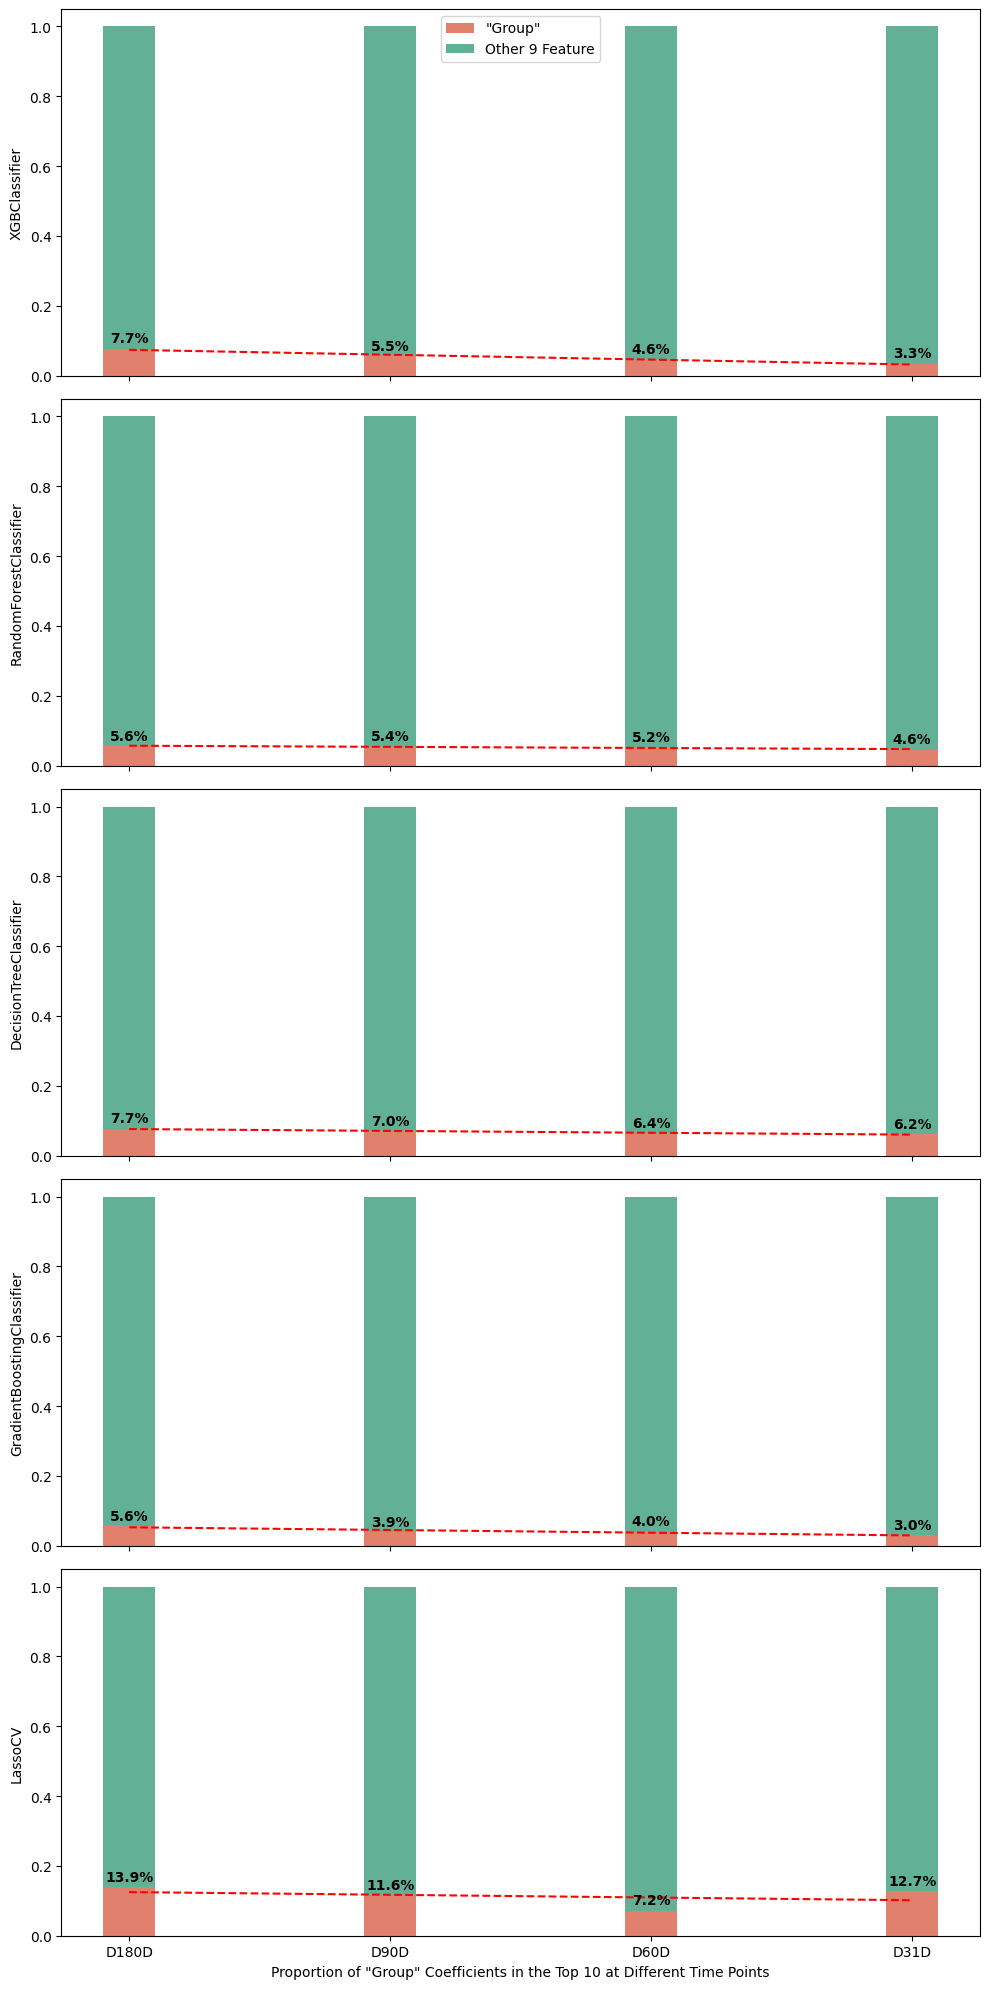

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个大的画布，调整figsize参数使子图更扁，并设置sharex=True使所有子图共享x轴
fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

# 数据框列表
dfs = [df1, df2, df3, df4, df5]
methods = ['XGBClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'LassoCV']

for i, df in enumerate(dfs):
    # 计算每一列的非空值的和
    column_sums = df.sum()

    # 找到"Group"行的值
    group_values = df.loc['Group']

    # 计算"Group"行的值在总和中的占比
    group_percentages = group_values / column_sums

    # 计算其余所有非空行值的占比
    other_values = df.drop('Group')
    other_percentages = other_values.sum() / column_sums

    # 创建堆叠条形图
    N = len(df.columns)
    ind = np.arange(N)
    width = 0.2  # 更窄的柱子

    # 交换柱子的颜色
    p1 = axs[i].bar(ind, group_percentages, width, color='#E1816D')
    p2 = axs[i].bar(ind, other_percentages, width, bottom=group_percentages, color='#62B197')

    # 在每个柱子上添加数字标签
    for j, v in enumerate(group_percentages):
        # 颜色使用黑色
        axs[i].text(j, v + 0.01, f'{v*100:.1f}%', color='black', ha='center', va='bottom', fontweight='bold')
                                                       

    # 修改横轴的标题
    axs[i].set_ylabel(f'{methods[i]}')  # 只包含特征选择方法的名称

    axs[i].set_xticks(ind)
    axs[i].set_xticklabels(df.columns)

    # 只在第一个子图中添加图例
    if i == 0:
        axs[i].legend((p1[0], p2[0]), ('"Group"', 'Other 9 Feature'))

    # 计算趋势线
    z = np.polyfit(ind, group_percentages, 1)
    p = np.poly1d(z)

    # 添加趋势线到图表
    axs[i].plot(ind, p(ind), 'r--')

# 在最后一个子图上设置x轴的标题
axs[-1].set_xlabel('Proportion of "Group" Coefficients in the Top 10 at Different Time Points')

plt.tight_layout()
plt.show()